##  Support Vector Machines:Basic SVM, Soft Margin SVM.

In [267]:
# imports
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.colors as co


In [268]:
# install library
# ! pip install cvxpy


### Resolviendo el sistema no lineal utilizando `cvxpy`

\begin{align}
\min &\|\mathbf w\|\\
\text{s.t.} &y_i(\mathbf w^T x_i + b) \ge 1, i = 1, \dots, L
\end{align}


In [269]:
X, y = make_blobs(100, centers=2, n_features=2, random_state=50)
y = y * 2 - 1


In [270]:
def svm_prim_sep(X: np.ndarray, y: np.ndarray):
    m, n = X.shape
    w = cp.Variable(n)
    b = cp.Variable()
    objective = cp.Minimize(cp.norm(w))
    constraints = [cp.multiply(y, X @ w + b) >= 1]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    return w.value, b.value


In [271]:
w_sol = svm_prim_sep(X, y)[0]
w_sol


array([-0.74427951,  0.82511409])

### Usando SKLearn

In [272]:
from sklearn.svm import SVC
svm = SVC(gamma='scale', kernel='linear')
svm.fit(X, y)


SVC(kernel='linear')

In [273]:
svm.coef_


array([[-0.74427943,  0.82511386]])

### Graficando resultados

In [274]:
f = lambda x: w_sol[0] + x * w_sol[1]


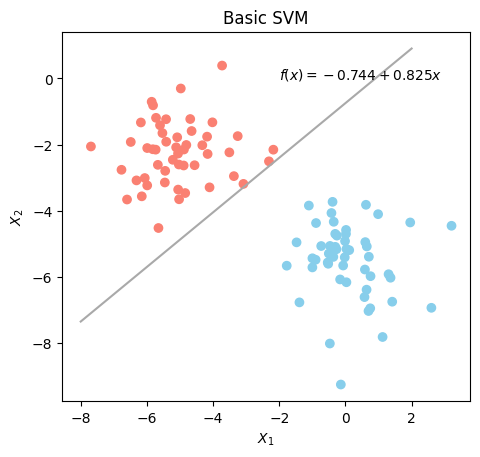

In [275]:
plt.title("Basic SVM")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=co.ListedColormap(['skyblue', 'salmon']))
plt.plot([-8, 2], [f(-8), f(2)], c='darkgray')
plt.text(x=-2, y=0, s=f"$f(x)={w_sol[0]:0.3f} + {w_sol[1]:0.3f}x$")
plt.axis("scaled")
plt.show()


### Bibliografía

[1] Li, L. (2015). *Selected applications of convex optimization* (Vol. 103). Berlin, Germany: Springer.